In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime

In [2]:
# Read in the example catalog 
catalog = pd.read_csv("D:\Yihe\Louis_CorinthData\OtherEQCatalogs\SOULTZ_19932000Best_agreement_induced\SSFS2004-Catalogue - Copy.csv")

In [4]:
# Inj Start 13/09/2004 8:10:43
# Inj End 16/09/2004 20:05:18
injSt = datetime(2004,9,13,8,10,43).timestamp()/86400
injEnd = datetime(2004,9,16,20,5,18).timestamp()/86400 - injSt
print(injEnd)

3.496238425925185


In [5]:
DT =[]
dt=[]
for i in range(len(catalog["Date"])):
    ds = catalog["Date"][i].split("/")
    ts = catalog["Time"][i].split(":")
    DT.append(datetime(int(ds[2]),int(ds[1]),int(ds[0]),int(ts[0]),int(ts[1]),int(ts[2])))
    dt.append(datetime(int(ds[2]),int(ds[1]),int(ds[0]),int(ts[0]),int(ts[1]),int(ts[2])).timestamp()/86400.0-injSt)
print(len(DT))


5861


In [6]:



# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['ML'], catalog['East (m)'], catalog['North(m)'], catalog['Depth (m)'])
    if injSt-injSt <= d <= injEnd
])
print(len(magF),len(dt))

5016 5861


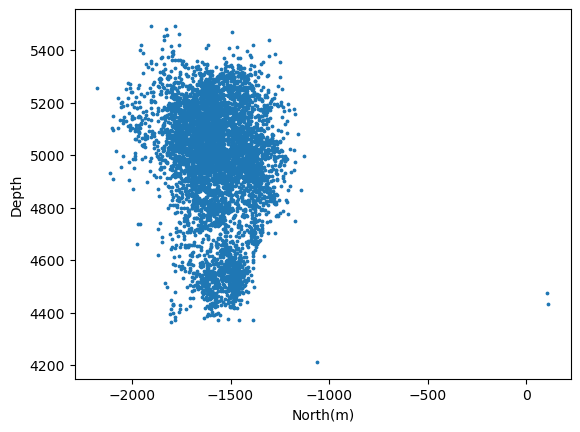

In [4]:
plt.scatter(catalog["North(m)"],catalog["Depth (m)"],s=3)
plt.xlabel("North(m)")
plt.ylabel("Depth")
plt.show()

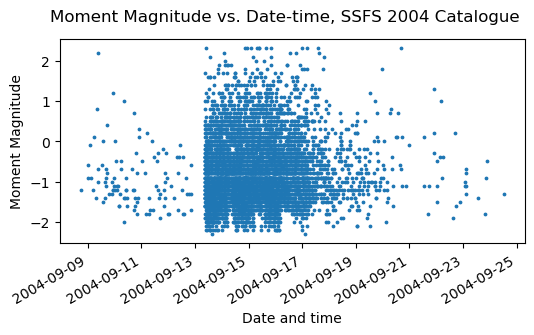

In [5]:

#plt.scatter(DT,catalog["M.magnit"],s=3)
#plt.xlabel("Time")
#plt.ylabel("Mw")
#plt.show()
figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(DT,catalog["ML"],s=3)
figure.suptitle("Moment Magnitude vs. Date-time, SSFS 2004 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(1996,9,22),datetime(1996,9,29)])
figure.autofmt_xdate()
plt.show()

In [15]:
# Drif Corrections

#%% correction  mag for Soultz 2004 and 2005
#M0 = 10.^(0.77*mag0+9.16);
#mag0=(2/3)*log10(M0)-6.1;

M0 = np.power(10,0.77*np.array(magF)+9.16)
MNew = 2/3.0*np.log10(M0)-6.1

In [8]:
# Calculate b-value for the 'M.magnit' column 
bins = np.arange(-2, 6, 0.1)
b, Mc, hist = b_value_functions.btrad(MNew, bins, delta_b = 0.01)
histp, bp = b_value_functions.bpos(MNew)
bv = b
print(bv,bp)

1.0539544238210143 1.1598742565377196


In [9]:
import statistics
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

228.0 -1612.0 5021.0


In [10]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

In [11]:
# create referential list to sort dist
dstc = dist.copy()
dstRef=[]
for i in range(len(dstc)):
    dstRef.append(i)

2006-12-03 18:57:03


In [12]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [13]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [12]:
print(DT[0],DT[-1])

2004-09-08 17:46:59 2004-09-24 12:20:00


In [16]:
#dist = np.sqrt((np.array(X)-xref)**2+(np.array(Y)-yref)**2+(np.array(Z)-zref)**2)
print(len(dist))

5016


In [16]:
DTN =  [(DT-dtF[0]).total_seconds()/86400.0 for dt in DT]

In [17]:
## Continue here tomorrow, need to edit the SSFSHydraulicStimCSV to read
MwE2 =[]
MwEInj=[]
TE2=[]
TEInj=[]
dstE2=[]
dstInj=[]
for i in range(len(MNew)):
    if DTN[i] < 8.099525462962964:
        MwEInj.append(MNew[i])
        TEInj.append(DTN[i])
        dstInj.append(dist[i])

In [18]:
# Sort array based on 90th percentile mimicking method from Danre et al 2022
# find 90th percentile and above for every 50 events, build 4 array (percentile and non percentile)
percM =[]
percT =[]
percD=[]
rstM =[]
rstT =[]
rstD =[]

dtF = np.array(dtF)

for z in range(50,len(dtF)-50,50):
    #print(i,len(catalog["Time"]))
    #print(z)
    subDist=np.array(dist[z-50:z].copy())
    subTime=np.array(dtF[z-50:z].copy())
    subDstRef=[x for x in range(z-50,z)]
    quicksort_with_swaps(subDist, subDstRef, 0, len(subDist)-1)
    
    pM=[]
    pT=[]
    pD=[]
    rM=[]
    rT=[]
    rD=[]
    for y in range(50):
        if y<45:
            rM.append(MNew[subDstRef[y]])
            rT.append(dtF[subDstRef[y]])
            rstD.append(dist[subDstRef[y]])
        if y>=45:
            pM.append(MNew[subDstRef[y]])
            pT.append(dtF[subDstRef[y]])
            pD.append(dist[subDstRef[y]])
    percM += pM
    percT += pT
    percD += pD
    rstM += rM
    rstT += rT
    rstD += rD

In [19]:
print(len(rstM))

4455


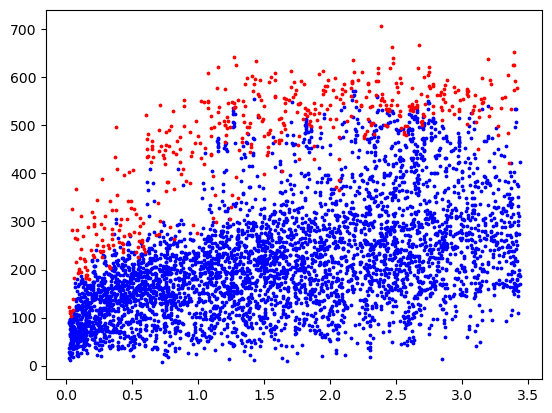

In [20]:
plt.scatter(rstT,rstD,c='b',s=3)
plt.scatter(percT,percD,c='r',s=3)

plt.show()

In [22]:
rtT=[]
rtD=[]
pcT=[]
pcD=[]
for i in range (len(rstT)):
    if rstT[i]>datetime(2004,9,13) and rstT[i]<datetime(2004,9,20):
        rtT.append(rstT[i])
        rtD.append(rstD[i])
        
for i in range (len(percT)):
    if percT[i]>datetime(2004,9,13) and percT[i]<datetime(2004,9,20):
        pcT.append(percT[i])
        pcD.append(percD[i])

TypeError: '>' not supported between instances of 'float' and 'datetime.datetime'

In [21]:
rTN = np.array((np.array(rtT))-min(rtT)).astype('timedelta64[s]').astype('int64')
pTN = np.array((np.array(pcT))-min(pcT)).astype('timedelta64[s]').astype('int64')

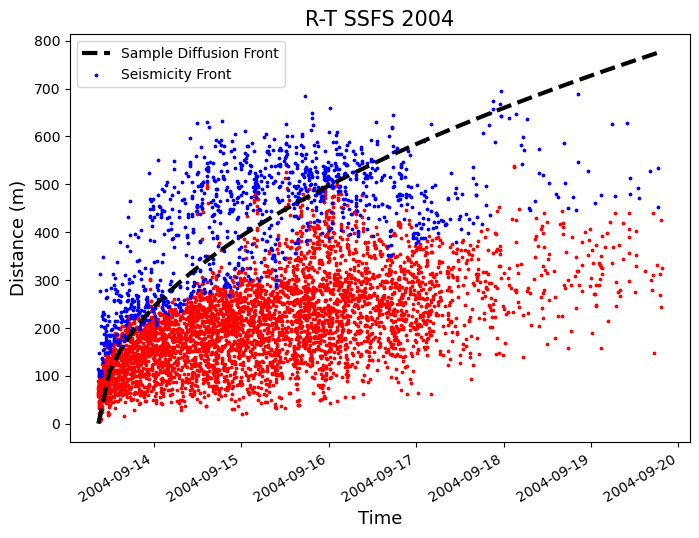

In [33]:
def sqrt(x, m):
    return m * np.sqrt((x) * 4)
from scipy.optimize import curve_fit

# Reasonable initial guess: m=1.0, c=0.0 or slightly less than min(pTN)
params, _ = curve_fit(sqrt, pTN,pcD)
m = params
x = np.linspace(0,max(pTN))
start_time = np.datetime64(min(pcT))
fig, ax1 = plt.subplots(figsize=(8,6))
xt = x.astype('timedelta64[s]') + start_time
y = np.sqrt(4*x)*m
plt.plot(xt,y,color='k',linewidth=3,linestyle='--',label='Sample Diffusion Front')
plt.scatter(rtT,rtD,c='r',s=3)
plt.scatter(pcT,pcD,c='b',s=3,label='Seismicity Front')
plt.title("R-T SSFS 2004",size=15)
plt.xlabel("Time",size=13)
plt.ylabel("Distance (m)",size=13)
fig.autofmt_xdate()
plt.legend()
plt.show()

In [21]:
pbp=[]
plbp=[]
phbp=[]
pstdp=[]
pb=[]
plb=[]
phb=[]
pstd=[]
pdtr=[]

quicksort_with_swaps(percT,percM,0,len(percT)-1)
for i in range(300,len(percM),30):
    print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(percM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    pb.append(b)
    pdtr.append(percT[i])
    pbp.append(bP)
    plb.append(low_b)
    plbp.append(low_bp)
    phb.append(high_b)
    phbp.append(high_bp)
    pstd.append(std)
    pstdp.append(stdp)

300
330
360
390
420
450
480


In [22]:
rbp=[]
rlbp=[]
rhbp=[]
rstdp=[]
rb=[]
rlb=[]
rhb=[]
rstd=[]
rdtr=[]
print(len(rstM))
quicksort_with_swaps(rstT,rstM,0,len(rstT)-1)
for i in range(300,len(rstM),30):
    #print(i)
    mxt=[]
    md=0
    for x in range(i-300,i):
        mxt.append(rstM[x])
    mxT=np.array(mxt)
    b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
    hist1, bP = b_value_functions.bpos(mxT)
    low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
    low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
    rb.append(b)
    rdtr.append(rstT[i])
    rbp.append(bP)
    rlb.append(low_b)
    rlbp.append(low_bp)
    rhb.append(high_b)
    rhbp.append(high_bp)
    rstd.append(std)
    rstdp.append(stdp)

4455


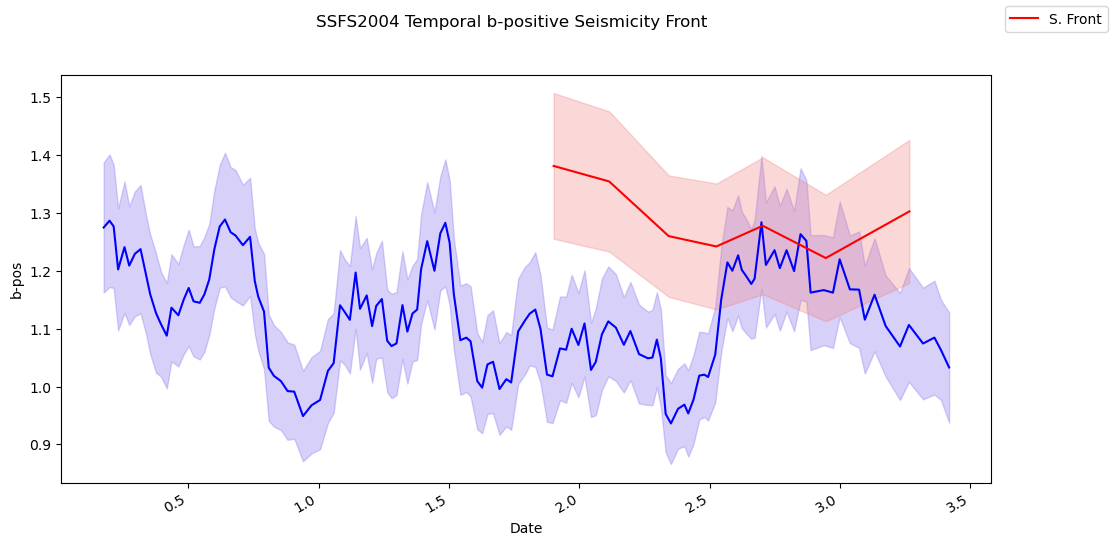

In [23]:
fig, ax1 = plt.subplots(figsize=(12,6))
fig.suptitle("SSFS2004 Temporal b-positive Seismicity Front")
ax1.plot(rdtr,rbp,color="blue")
ax1.fill_between(rdtr, np.subtract(rbp,rstdp), np.add(rbp,rstdp), alpha = 0.3, color = 'mediumslateblue')
ax1.plot(pdtr,pbp,color="red", label='S. Front')
ax1.fill_between(pdtr, np.subtract(pbp,pstdp), np.add(pbp,pstdp), alpha = 0.3, color = 'lightcoral')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

In [24]:
rstM1 = np.array(rstM)
b, Mc, hist = b_value_functions.btrad(rstM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(rstM1)
low_b, high_b, std = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(rstM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.0310405161978708 0.9391841195758222 1.064164394439942 0.03721484362868414
1.1159373668286514 1.0690352149729574 1.1651611705722857 0.024773719601977794


1.0310405161978708 0.9391841195758222 1.064164394439942 0.03721484362868414
1.1159373668286514 1.0690352149729574 1.1651611705722857 0.024773719601977794

In [25]:
percM1 = np.array(percM)
b, Mc, hist = b_value_functions.btrad(percM1, bins, delta_b = 0.01)
hist1, bP = b_value_functions.bpos(percM1)
low_b, high_b, std = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.01)    
low_bp, high_bp, stdp = b_value_functions.bootstrap(percM1, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.01)
print(b,low_b,high_b, std)
print(bP,low_bp,high_bp, stdp)

1.3442838346436525 1.2089440383449583 1.5805599561915227 0.1013349214976866
1.4152200519528473 1.2393336161536943 1.6219168779126358 0.09832992647115561


1.3442838346436525 1.2089440383449583 1.5805599561915227 0.1013349214976866
1.4152200519528473 1.2393336161536943 1.6219168779126358 0.09832992647115561

In [50]:

"""
90% bv
rst 0.4776433637430664 0.4696529648292253 0.5312073529151693 0.017879376794145294
perc 0.48048672878408555 0.45640187724285075 0.6813400257325489 0.06700610490984331
bp
rst 0.5241065027905603 0.5065315672884132 0.5410642714184372 0.008969211254722083
perc 0.6150490807411544 0.5583019009626263 0.6824637521782198 0.0326654180869235
80% bv
rst 0.4994661671555748 0.46625217910545086 0.532312682714946 0.019143386086198526
perc 0.5320850553400279 0.4971873412378097 0.6082591291009382 0.02878292536278657
bp
rst 0.5218256523711128 0.5033110215732233 0.5412166194366764 0.010197089659151639
perc 0.6093751782891131 0.5664074119707262 0.6574437525680047 0.023778207431053917
"""

# Neww
"""
90% bv
rst 1.038245721641828 0.949539951051887 1.0691231003448638 0.03429230681091674
perc 1.24641222515766 1.1033000060293168 1.4664525906242438 0.09217776829919976
bp
rst 1.138792650747617 1.0912446417622852 1.1881541681180503 0.023798461871635954
perc 1.3765929939233017 1.2235641918151616 1.587825962403667 0.0939799710915283
80% bv
rst 0.4994661671555748 0.46625217910545086 0.532312682714946 0.019143386086198526
perc 0.5320850553400279 0.4971873412378097 0.6082591291009382 0.02878292536278657
bp
rst 0.5218256523711128 0.5033110215732233 0.5412166194366764 0.010197089659151639
perc 0.6093751782891131 0.5664074119707262 0.6574437525680047 0.023778207431053917
"""

Me
